In [1]:
import time

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
import sys
import requests
from bs4 import BeautifulSoup
import html5lib
import pandas as pd
import plotly.figure_factory as ff

import re
import matplotlib.pyplot as plt
# フォント設定
plt.rcParams['font.family'] = 'Hiragino Sans'
# 太さ設定
plt.rcParams['font.weight'] = 'bold'

In [4]:

table_list = ['Table 1. Economic projections of Federal Reserve Board members and Federal Reserve Bank presidents, under their individual assumptions of projected appropriate monetary policy',
              'Figure 2. FOMC participants\' assessments of appropriate monetary policy: Midpoint of target range or target level for the federal funds rate']
table_list = ['Table 1. Economic projections',
              'Figure 2. FOMC participants']

In [5]:
url_list = ['https://www.federalreserve.gov/monetarypolicy/fomcprojtabl20250618.htm',
            'https://www.federalreserve.gov/monetarypolicy/fomcprojtabl20250319.htm',
            'https://www.federalreserve.gov/monetarypolicy/fomcprojtabl20241218.htm',
            'https://www.federalreserve.gov/monetarypolicy/fomcprojtabl20240918.htm',
            'https://www.federalreserve.gov/monetarypolicy/fomcprojtabl20240612.htm',
            'https://www.federalreserve.gov/monetarypolicy/fomcprojtabl20240320.htm',
            'https://www.federalreserve.gov/monetarypolicy/fomcprojtabl20231213.htm',
            'https://www.federalreserve.gov/monetarypolicy/fomcprojtabl20230920.htm',
            'https://www.federalreserve.gov/monetarypolicy/fomcprojtabl20230614.htm',
            ]
#

In [6]:
def get_table(arg_url):
    response = requests.get(arg_url)
    soup = BeautifulSoup(response.text, 'html5lib')

    #表データを抽出
    tables = soup.find_all('table', class_='pubtables')
    df_list = [pd.read_html(str(table))[0] for table in tables]
    #len(df_list)
    
    #表タイトルを抽出
    headers = soup.find_all(['h4','h5'], class_=['tablehead','tablesubhead'])
    headers = [re.sub(r'[\xc2-\xf4][\x80-\xbf]+','-',header.text.strip()) for header in headers]
    headers = [s for s in headers if not s.startswith('Figure 1.')]
    #len(headers)

    chk = []
    for s in table_list:
        for i in range(len(headers)):
            if headers[i].startswith(s):
                chk += [i]
        if len(chk) == 2:
            break
    chk = sorted(chk)

    df_list = [df_list[s] for s in chk]
    
    return df_list,headers

In [7]:
url_list[:2]

['https://www.federalreserve.gov/monetarypolicy/fomcprojtabl20250618.htm',
 'https://www.federalreserve.gov/monetarypolicy/fomcprojtabl20250319.htm']

### これより上のセルは事前に読み込んでおく

### FOMC当日 14:00

In [8]:
start = time.time()

In [9]:
dfs_old,headers = get_table(url_list[1])   
dfs_new,headers = get_table(url_list[0]) 

In [10]:
headers

['Table 1. Economic projections of Federal Reserve Board members and Federal Reserve Bank presidents, under their individual assumptions of projected appropriate monetary policy, June 2025',
 'Change in real GDP',
 'Unemployment rate',
 'PCE inflation',
 'Core PCE inflation',
 "Figure 2. FOMC participants' assessments of appropriate monetary policy: Midpoint of target range or target level for the federal funds rate",
 "Figure 3.A. Distribution of participants' projections for the change in real GDP, 2025-27 and over the longer run",
 "Figure 3.B. Distribution of participants' projections for the unemployment rate, 2025-27 and over the longer run",
 "Figure 3.C. Distribution of participants' projections for PCE inflation, 2025-27 and over the longer run",
 "Figure 3.D. Distribution of participants' projections for core PCE inflation, 2025-27",
 "Figure 3.E. Distribution of participants' judgments of the midpoint of the appropriate target range for the federal funds rate or the appropri

In [11]:
def make_sep(arg_df):
    df1 = arg_df
    idx = [i for i in range(len(list(df1.columns))) if list(df1.columns)[i][1] == 'Longer run']

    df1 = df1.iloc[:,:idx[0]+1]
    df1 = df1.drop(df1.index[[8]])
    df1['Variable']=['実質GDP成長率','',
                     '失業率','',
                     'PCEインフレ率','',
                     'コアPCEインフレ率','',
                     'FF金利','']
    df1[('','date')]=['今回','前回']*5
    df1.columns = [s[1] for s in list(df1.columns)]
    df1 = df1.set_index(['Variable','date'])

    return df1

In [12]:
def make_sepEN(arg_df):
    df1 = arg_df
    idx = [i for i in range(len(list(df1.columns))) if list(df1.columns)[i][1] == 'Longer run']

    df1 = df1.iloc[:,:idx[0]+1]
    df1 = df1.drop(df1.index[[8]])
    df1['Variable']=['Real GDP Growth Rate','',
                     'Unemployment Rate','',
                     'PCE Inflation','',
                     'Core PCE Inflation','',
                     'FF rate','']
    df1[('','date')]=['Latest','Prior']*5
    df1.columns = [s[1] for s in list(df1.columns)]
    df1 = df1.set_index(['Variable','date'])

    return df1

In [13]:

sep_new = make_sep(dfs_new[0])
sep_new
# スクショを撮る方が綺麗に仕上がる

,,2025,2026,2027,Longer run
Variable,date,,,,
実質GDP成長率,今回,1.4,1.6,1.8,1.8
,前回,1.7,1.8,1.8,1.8
失業率,今回,4.5,4.5,4.4,4.2
,前回,4.4,4.3,4.3,4.2
PCEインフレ率,今回,3.0,2.4,2.1,2.0
,前回,2.7,2.2,2.0,2.0
コアPCEインフレ率,今回,3.1,2.4,2.1,NaN
,前回,2.8,2.2,2.0,NaN
FF金利,今回,3.9,3.6,3.4,3.0


https://symbl.cc/jp/unicode/blocks/geometric-shapes/#subblock-25A0

In [14]:
make_sepEN(dfs_new[0])

,,2025,2026,2027,Longer run
Variable,date,,,,
Real GDP Growth Rate,Latest,1.4,1.6,1.8,1.8
,Prior,1.7,1.8,1.8,1.8
Unemployment Rate,Latest,4.5,4.5,4.4,4.2
,Prior,4.4,4.3,4.3,4.2
PCE Inflation,Latest,3.0,2.4,2.1,2.0
,Prior,2.7,2.2,2.0,2.0
Core PCE Inflation,Latest,3.1,2.4,2.1,NaN
,Prior,2.8,2.2,2.0,NaN
FF rate,Latest,3.9,3.6,3.4,3.0


In [15]:
data_old = dfs_old[1].copy()
data_new = dfs_new[1].copy()

temp = list(data_new.columns)[1:]
data_new.columns = [('FF rate','1')]+ [(s,'1') for s in temp]

temp = list(data_old.columns)[1:]
data_old.columns = [('FF rate','0')]+ [(s,'0') for s in temp]

data_old = data_old.set_index(('FF rate','0'))
data_new = data_new.set_index(('FF rate','1'))

data = pd.concat([data_new,data_old],axis=1).fillna(0).astype(int)

temp = sorted(list(data.columns))
if temp[0][0] != temp[1][0]:temp = temp[1:] #3月公表時は、12月公表時の前年末データを削除
data = data.loc[:,temp].sort_index(ascending=False)

data.head()

,"(2025, 0)","(2025, 1)","(2026, 0)","(2026, 1)","(2027, 0)","(2027, 1)","(Longer run, 0)","(Longer run, 1)"
4.500,0,0,0,0,0,0,0,0
4.375,4,7,0,0,0,0,0,0
4.250,0,0,0,0,0,0,0,0
4.125,4,2,3,1,0,0,0,0
4.000,0,0,0,0,0,0,0,0


In [16]:

def generate_array(X,arg_shift):
    pos_x = []
    # Xが奇数の場合
    if X % 2 != 0:
        # ゼロポジション
        pos_x += [0+arg_shift]
        #print(pos)
        X -= 1  # ゼロポジションをとったのでXを1減らす

        pos_r = 0+arg_shift
        pos_l = 0+arg_shift
        while X > 0:           
            pos_x += [pos_r+1,pos_l-1]
            X -= 2
            pos_l = pos_l - 1
            pos_r = pos_r + 1

    # Xが偶数の場合
    if (X % 2 == 0)&(X != 0):
        pos_r = 0.5+arg_shift
        pos_l = -0.5+arg_shift
        pos_x += [pos_r,pos_l]

        X -= 2  # ゼロポジションの横に2つ'1'を代入したのでXを2減らす

        # 左右に1つ飛びで'1'を代入
        while X > 0:
            pos_x += [pos_r+1,pos_l-1]
            X -= 2
            pos_l = pos_l - 1
            pos_r = pos_r + 1

    return pos_x

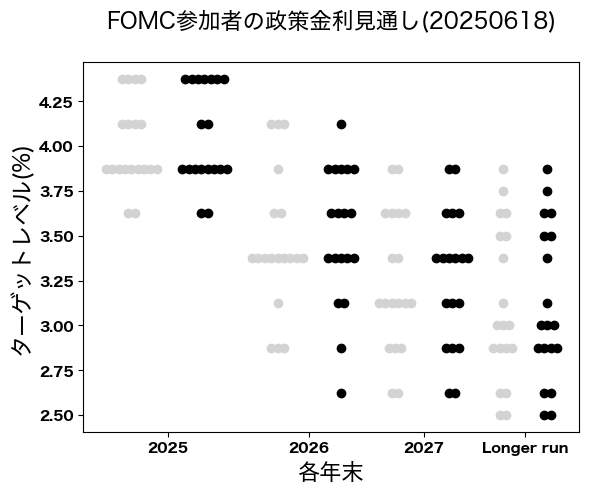

,,2025,2026,2027,Longer run
Variable,date,,,,
実質GDP成長率,今回,1.4,1.6,1.8,1.8
,前回,1.7,1.8,1.8,1.8
失業率,今回,4.5,4.5,4.4,4.2
,前回,4.4,4.3,4.3,4.2
PCEインフレ率,今回,3.0,2.4,2.1,2.0
,前回,2.7,2.2,2.0,2.0
コアPCEインフレ率,今回,3.1,2.4,2.1,NaN
,前回,2.8,2.2,2.0,NaN
FF金利,今回,3.9,3.6,3.4,3.0


In [17]:

col_pos = [s[0] for s in list(data.columns)]

shift_para = 0
x_ticks = []

k = 0
date = re.findall(r'[0-9]{8}',url_list[0])[0]
if date[-4:-2] == '12':
    col_jump = 2
    col_pos = col_pos[2:]
    #print(col_pos)
else:
    col_jump = 0
#print(col_jump)

for j in range(col_jump,data.shape[1]):
    
    if k > 0:
        max_num = data.iloc[:,j].max()
        shift_para += temp + max_num/2 + 3
    k = 1
    for i in range(data.shape[0]):
        if not data.iloc[i,j] == 0:
            idx = list(data.index)[i]
            x_coordinates = generate_array(data.iloc[i,j],shift_para)
            y_coordinates = [idx]*len(x_coordinates)
            if list(data.columns)[j][1] == '1':
                plt.scatter(x_coordinates, y_coordinates, color='black', marker='o')
            else:
                plt.scatter(x_coordinates, y_coordinates, color='lightgray', marker='o')
    
    temp = data.iloc[:,j].max()/2

    if j == 0:
        pos = 0
    else:
        pos = shift_para
    x_ticks += [pos]

x_ticks0 = []
for i in range(len(col_pos)-1):
    if col_pos[i] == col_pos[i+1]:
        x_ticks0 += [(x_ticks[i]+x_ticks[i+1])/2]
    elif (len(col_pos)%2 != 0)&(col_pos[i] != col_pos[i+1])&(col_pos[i+1] == 'Longer run'):
        x_ticks0 += [x_ticks[i]]

plt.xticks(x_ticks0,sorted(list(set(col_pos))))

# グラフの見た目を調整
plt.title('FOMC参加者の政策金利見通し('+date+')\n',size=16)
plt.xlabel('各年末',size=16)
plt.ylabel('ターゲットレベル(%)',size=16)

# グラフを保存
plt.savefig('dot_chart/FOMC参加者の政策金利見通し('+date+').png')


# グラフを表示
plt.show()
sep_new

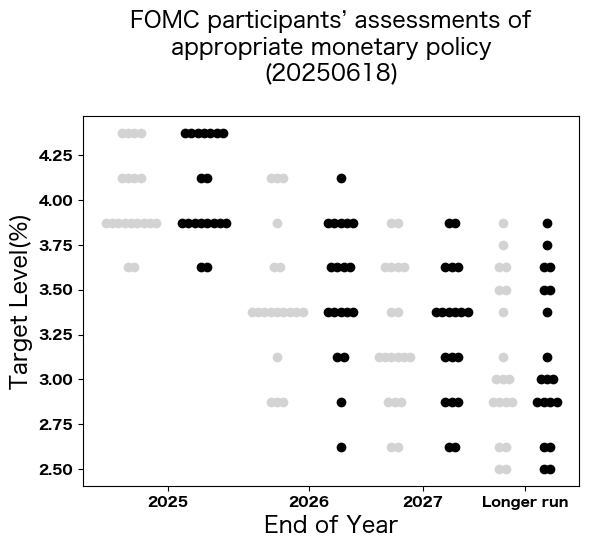

,,2025,2026,2027,Longer run
Variable,date,,,,
Real GDP Growth Rate,Latest,1.4,1.6,1.8,1.8
,Prior,1.7,1.8,1.8,1.8
Unemployment Rate,Latest,4.5,4.5,4.4,4.2
,Prior,4.4,4.3,4.3,4.2
PCE Inflation,Latest,3.0,2.4,2.1,2.0
,Prior,2.7,2.2,2.0,2.0
Core PCE Inflation,Latest,3.1,2.4,2.1,NaN
,Prior,2.8,2.2,2.0,NaN
FF rate,Latest,3.9,3.6,3.4,3.0


In [18]:
col_pos = [s[0] for s in list(data.columns)]

shift_para = 0
x_ticks = []

k = 0
date = re.findall(r'[0-9]{8}',url_list[0])[0]
if date[-4:-2] == '12':
    col_jump = 2
    col_pos = col_pos[2:]
    #print(col_pos)
else:
    col_jump = 0
#print(col_jump)

for j in range(col_jump,data.shape[1]):
    
    if k > 0:
        max_num = data.iloc[:,j].max()
        shift_para += temp + max_num/2 + 3
    k = 1
    for i in range(data.shape[0]):
        if not data.iloc[i,j] == 0:
            idx = list(data.index)[i]
            x_coordinates = generate_array(data.iloc[i,j],shift_para)
            y_coordinates = [idx]*len(x_coordinates)
            if list(data.columns)[j][1] == '1':
                plt.scatter(x_coordinates, y_coordinates, color='black', marker='o')
            else:
                plt.scatter(x_coordinates, y_coordinates, color='lightgray', marker='o')
    
    temp = data.iloc[:,j].max()/2

    if j == 0:
        pos = 0
    else:
        pos = shift_para
    x_ticks += [pos]

x_ticks0 = []
for i in range(len(col_pos)-1):
    if col_pos[i] == col_pos[i+1]:
        x_ticks0 += [(x_ticks[i]+x_ticks[i+1])/2]
    elif (len(col_pos)%2 != 0)&(col_pos[i] != col_pos[i+1])&(col_pos[i+1] == 'Longer run'):
        x_ticks0 += [x_ticks[i]]

plt.xticks(x_ticks0,sorted(list(set(col_pos))))

# グラフの見た目を調整
plt.title("FOMC participants’ assessments of\nappropriate monetary policy\n("+date+")\n",size=16)
plt.xlabel('End of Year',size=16)
plt.ylabel('Target Level(%)',size=16)

# グラフを保存
plt.savefig('dot_chart/FOMC参加者の政策金利見通し_英語版('+date+').png')


# グラフを表示
plt.show()

make_sepEN(dfs_new[0])

In [19]:
print(time.time()-start)

1.9634830951690674


### ここまで

In [20]:

arg_url = url_list[0]
response = requests.get(arg_url)
soup = BeautifulSoup(response.text, 'html5lib')

#表データを抽出
tables = soup.find_all('table', class_='pubtables')
df_list = [pd.read_html(str(table))[0] for table in tables]

#表タイトルを抽出
headers = soup.find_all(['h4','h5'], class_=['tablehead','tablesubhead'])
headers = [re.sub(r'[\xc2-\xf4][\x80-\xbf]+','-',header.text.strip()) for header in headers]
headers = [s for s in headers if not s.startswith('Figure 1.')]


In [21]:
df_list[5].head()

,Midpoint of target range or target level (Percent),2025,2026,2027,Longer run
0,4.500,NaN,NaN,NaN,NaN
1,4.375,7.0,NaN,NaN,NaN
2,4.250,NaN,NaN,NaN,NaN
3,4.125,2.0,1.0,NaN,NaN
4,4.000,NaN,NaN,NaN,NaN
